Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [7]:
# This Part also done in the API call parts (Yelp), Thats why just keeping it as a comment

#for result in results:
#             name = result['name']
#             latitude = result['coordinates']['latitude']
#             longitude = result['coordinates']['longitude']
#             categories = result.get('categories', [])
#             categories_name = categories[0]['title'] if categories else 'N/A'
#             list_results_Yelp.append([name, latitude, longitude, categories_name, api_latitude, api_longitude])
#     else:
#         print(f"No Response for latitude: {api_latitude}, longitude: {api_longitude}")

# # Create a DataFrame from the list of results
# data_frame_Yelp = pd.DataFrame(list_results_Yelp, columns=['Name', 'Latitude', 'Longitude', 'Category', 'API Latitude', 'API Longitude'])


# Load the dat
# Importing the Data Frame of Yelp & City Bike:
#Imorting the City_Bikes Data
import pandas as pd
#pip install --upgrade xlrd
df_yelp=pd.read_excel('data_frame_yelp.xlsx')
#df.head()
df_yelp.shape

(250, 6)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

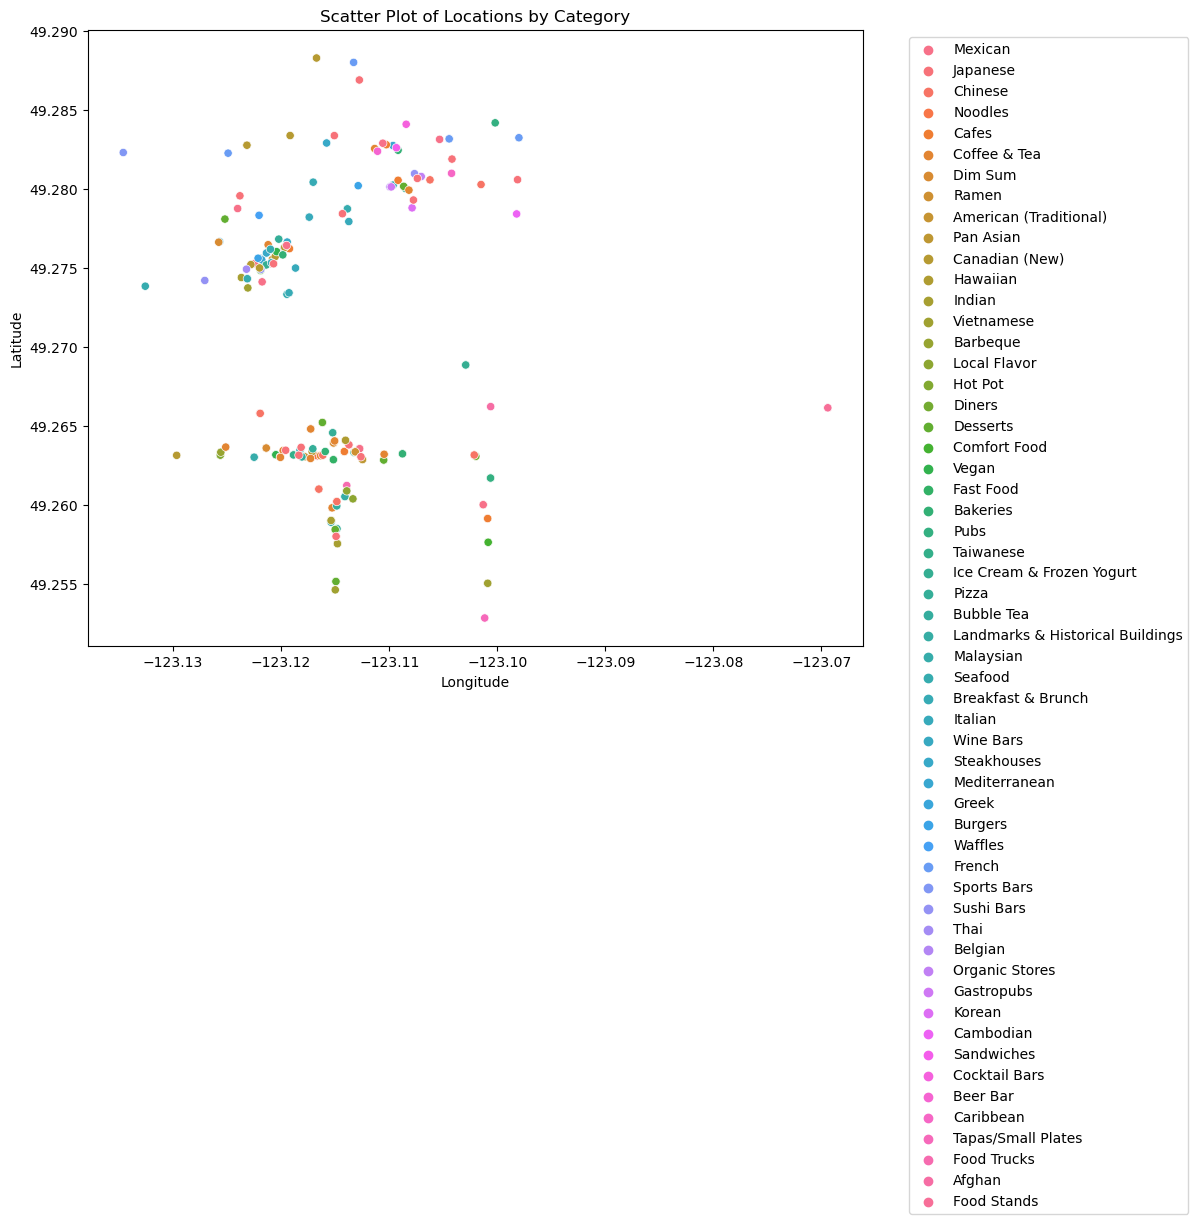

In [11]:
#Scatter plot of the latitude and longitude

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_yelp=pd.read_excel('data_frame_yelp.xlsx')

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a scatter plot of Latitude and Longitude
sns.scatterplot(data=df_yelp, x='Longitude', y='Latitude', hue='Category')

# Set the title and labels
plt.title('Scatter Plot of Locations by Category')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

#Observations

#1. Places seem to be fairly well spread out across the represented area, but there appears to be a higher density of places around the center.
#2. Most of the places appear to fall within certain bounds of longitude and latitude, suggesting a geographical area of interest.

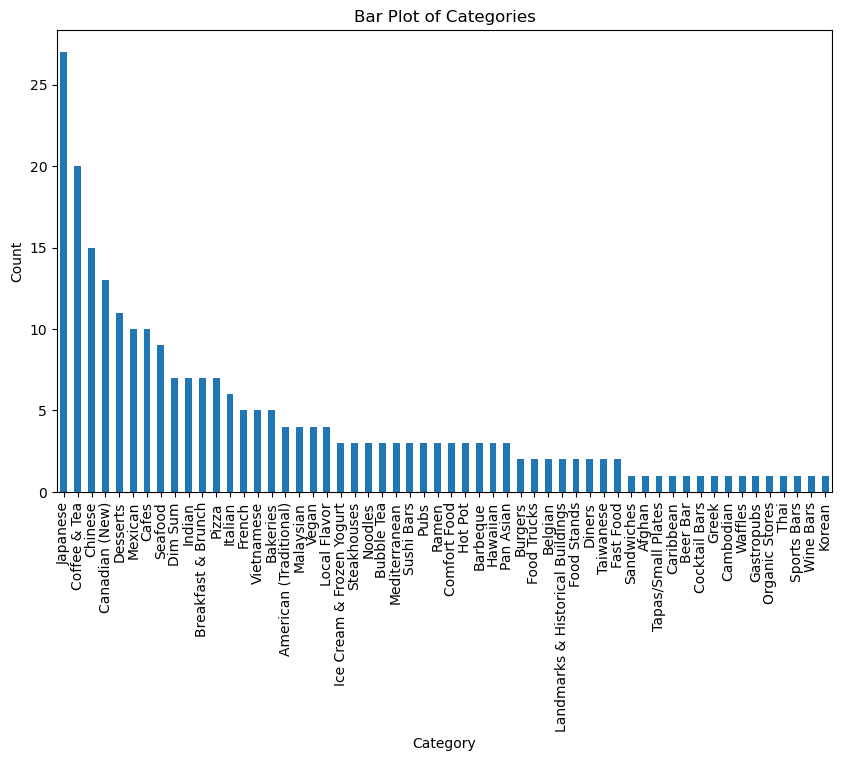

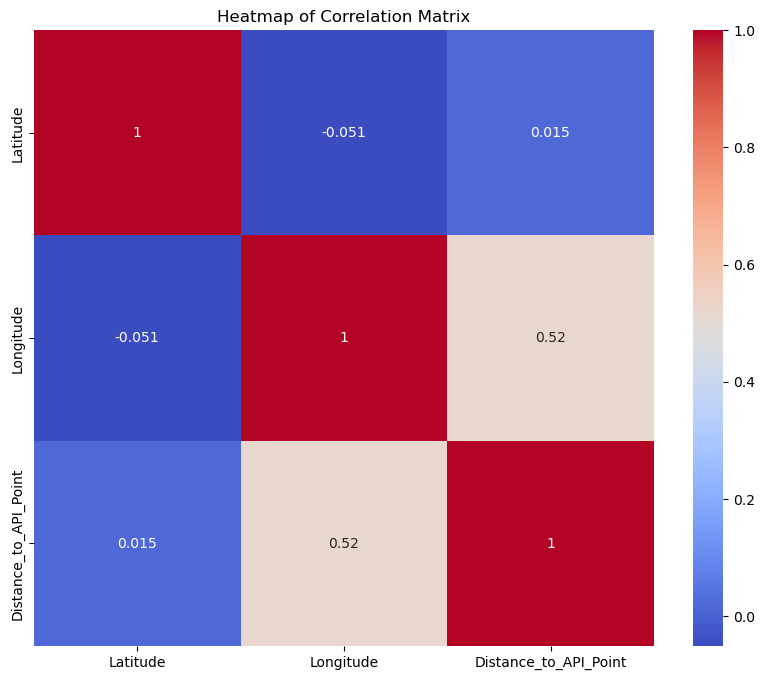

In [14]:
## Bar Plot & Heat Map##
#To visualize the count of each category in the dataset.
#To to understand the relationship between different numerical variables in the dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_yelp=pd.read_excel('data_frame_yelp.xlsx')

# Redefine the function to calculate the distance
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, (lat1, lon1, lat2, lon2))

    # Difference in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    return 2 * 6371 * np.arcsin(np.sqrt(a))  # 2*r*asin...

# Calculate the distance for each row in the dataframe
df_yelp['Distance_to_API_Point'] = calculate_distance(df_yelp['Latitude'], df_yelp['Longitude'], df_yelp['API Latitude'], df_yelp['API Longitude'])

# Bar plot
plt.figure(figsize=(10, 6))
df_yelp['Category'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_yelp[['Latitude', 'Longitude', 'Distance_to_API_Point']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [ ]:
# The first plot is a bar plot.#


# The plot represents different categories of places in the dataset.
# Each bar in the plot corresponds to a specific category.
# The height of each bar indicates the number of places in that category.
# Some categories, such as "Japanese", "Pizza", and "Cafes", are more frequent in the dataset compared to others.
# The bar plot provides an overview of the distribution of places across different categories in the dataset.

In [ ]:
# The second plot is a heatmap of the correlation matrix#.


# The heatmap represents the correlation between numerical variables: latitude, longitude, and distance to the API point.
# Each cell in the heatmap shows the correlation coefficient between a pair of variables.
# The color of the cell indicates the strength and direction of the correlation (blue for positive, red for negative).
# Observations from the heatmap:
                            # Strong positive correlation between longitude and the distance to the API point.
                            # As longitude increases, the distance to the API point tends to increase.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [28]:
import pandas as pd
import sqlite3
import os

# Read the data into a DataFrame
df_citybike = pd.read_excel('CityBike.xls')
df_yelp=pd.read_excel('data_frame_yelp.xlsx')
df_Foursqure = pd.read_excel('Four_Square.xls')

# Create the data directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

# Create a connection to the SQLite database
conn = sqlite3.connect('data/results.db')

# Create a table for CityBike data
df_citybike.to_sql('citybike_data', conn, if_exists='replace', index=False)

# Create a table for Yelp data
df_yelp.to_sql('yelp_data', conn, if_exists='replace', index=False)

# Create a table for Yelp data
df_Foursqure.to_sql('df_Foursqure', conn, if_exists='replace', index=False)

# Close the connection to the database
conn.close()


Look at the data before and after the join to validate your data.

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('data/results.db')

# Get the cursor
cursor = conn.cursor()

# Get the table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for table in tables:
    print(table[0])

# Close the connection to the database
conn.close()
